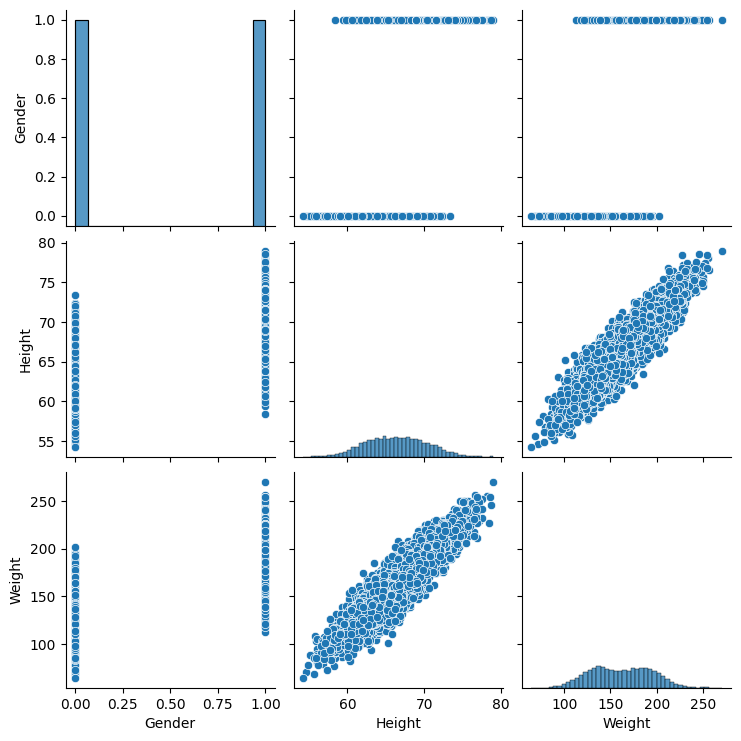

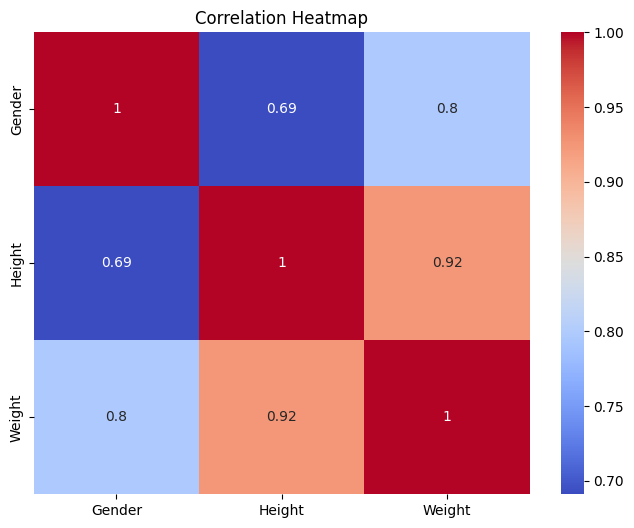

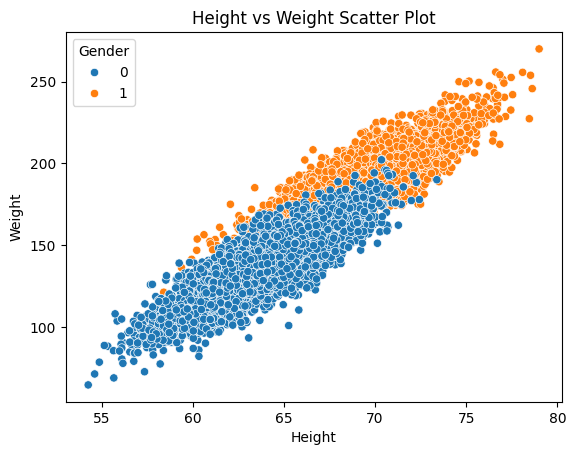

Mean Squared Error: 149.00
R-squared: 0.86


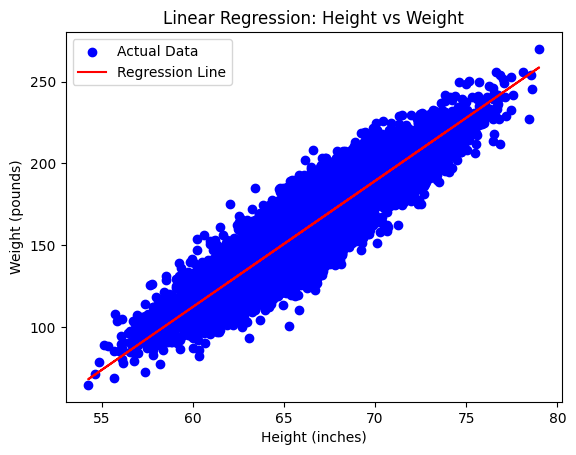

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

data= pd.read_csv("weight-height.csv")

df = pd.DataFrame(data)

df.isnull().sum()

df.sample(5)

df['Gender']=df['Gender'].map({'Male':1,'Female':0})

sns.pairplot(df)
plt.show()

df.describe()

# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

sns.scatterplot(x='Height', y='Weight', hue='Gender', data=df)
plt.title('Height vs Weight Scatter Plot')
plt.show()

X=df[['Height']]  ## *******************
y=df['Weight']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model=LinearRegression()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

# Calculate Mean Squared Error (MSE)
# MSE measures the average of the squares of the errors
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

# Calculate R-squared (R²)
# R² indicates the proportion of the variance for the dependent variable that's explained by the independent variables
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

#Visualize the regression line
plt.scatter(X, y, color="blue", label="Actual Data")
plt.plot(X, model.predict(X), color="red", label="Regression Line")
plt.title("Linear Regression: Height vs Weight")
plt.xlabel("Height (inches)")
plt.ylabel("Weight (pounds)")
plt.legend()
plt.show()